In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

In [2]:
u_1 = np.array([2, 2])
u_2 = np.array([-5, -3])

In [8]:
cov_1 = np.array([[0.5, 1], [1, 1]])
cov_2 = np.array([[1.5, 1], [2, 1]])

In [9]:
d1 = np.random.multivariate_normal(u_1, cov_1, 500)
d2 = np.random.multivariate_normal(u_2, cov_2, 500)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15580\1073053494.py:1: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d1 = np.random.multivariate_normal(u_1, cov_1, 500)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_15580\1073053494.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  d2 = np.random.multivariate_normal(u_2, cov_2, 500)


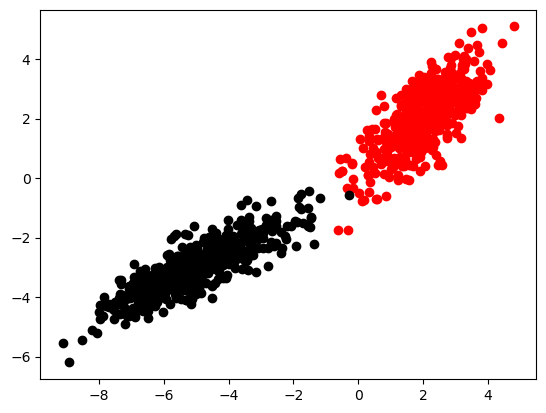

In [13]:
plt.scatter(d1[:, 0], d1[:, 1], color = 'red')  #0 dogs
plt.scatter(d2[:, 0], d2[:, 1], color = 'black') #1 cats

In [14]:
d1.shape

(500, 2)

In [15]:
d2.shape

(500, 2)

In [17]:
dataset = np.ones((1000, 4))

In [18]:
dataset.shape

(1000, 4)

In [20]:
dataset[:4]

array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [22]:
dataset[:500, 1:3] = d1

In [23]:
dataset[500:, 1:3] = d2

In [24]:
dataset[:4]

array([[1.        , 1.98704193, 2.08234513, 1.        ],
       [1.        , 2.18252152, 1.31555186, 1.        ],
       [1.        , 2.32368307, 1.32480204, 1.        ],
       [1.        , 0.94777987, 1.04595874, 1.        ]])

In [25]:
dataset[:500, -1] = 0

In [26]:
dataset[:4]

array([[1.        , 1.98704193, 2.08234513, 0.        ],
       [1.        , 2.18252152, 1.31555186, 0.        ],
       [1.        , 2.32368307, 1.32480204, 0.        ],
       [1.        , 0.94777987, 1.04595874, 0.        ]])

In [27]:
dataset[-4:]

array([[ 1.        , -6.26656097, -3.99271175,  1.        ],
       [ 1.        , -5.85070498, -3.47220914,  1.        ],
       [ 1.        , -4.00366169, -2.87900151,  1.        ],
       [ 1.        , -3.09665006, -2.34823502,  1.        ]])

In [30]:
x_train = dataset[:800,:-1]
y_train = dataset[:800, -1]
x_test = dataset[800:, :-1]
y_test = dataset[800:, -1]

In [31]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(800, 3) (800,) (200, 3) (200,)


In [32]:
y_train = y_train.reshape((-1, 1))

In [34]:
y_train.shape

(800, 1)

In [35]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [37]:
# def hypothesis(X, theta):
#     return sigmoid(np.dot(X, theta))

def hypothesis(X, theta):
    return 1/(1 + np.exp(np.dot(X, theta)))

In [39]:
def cost(X, Y, theta):
    
    y_p = hypothesis(X, theta)
    

    loss = -1*(np.mean(Y*np.log(y_p) + (1-Y)*np.log(1 - y_p)))
    
    return loss